#**PROJEK: COVID-19 INDONESIA**








In [1]:
import requests
import numpy as np
import pandas as pd
from datetime import datetime

resp = requests.get('https://data.covid19.go.id/public/api/update.json', verify=False)
print("Status Keberhasilan", resp)
print("")
print("Status Headers", resp.headers)
print("")
update = resp.json()

print('Length of cov_id_raw : %d.' %len(update))
print('Komponen cov_id_raw  : %s.' %update.keys())

covid_id = update['update']

print('Tanggal pembaharuan data penambahan kasus :', covid_id['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', covid_id['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', covid_id['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', covid_id['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', covid_id['total']['jumlah_meninggal'])

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Status Keberhasilan <Response [200]>

Status Headers {'Server': 'nginx', 'Date': 'Fri, 21 Oct 2022 15:02:40 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Fri, 21 Oct 2022 15:01:19 GMT', 'ETag': 'W/"6352b43f-5b519"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).
Tanggal pembaharuan data penambahan kasus : 2022-10-21
Jumlah penambahan kasus sembuh : 1970
Jumlah penambahan kasus meninggal : 18
Jumlah total kasus positif hingga saat ini : 6467189
Jumlah total kasus meninggal hingga saat ini: 158398


#**SPESIFIK PROVINSI: COVID- 19 SULAWESI SELATAN**

**Data COVID-19 SULSEL**

In [31]:
import numpy as np
import pandas as pd
import requests
resp_sulsel = requests.get('https://data.covid19.go.id/public/api/prov_detail_SULAWESI_SELATAN.json', verify=False)
#Chechk Status Code Apakah request has succeeded or not
print("Status Keberhasilan", resp)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Status Keberhasilan <Response [200]>


In [30]:
#Mencari tahu nama-nama elemen utama yang tersedia pada data dengan method keys()
print('Nama-nama elemen utama:\n',cov_sulsel_raw.keys())
#Mendapatkan informasi seputar Covid-19 Di sulsel
print('\nJumlah total kasus COVID-19 di Sulawesi Selatan                : %d' %cov_sulsel_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Sulawesi Selatan         : %f.2%%' %cov_sulsel_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Sulawesi Selatan : %f.2%%' %cov_sulsel_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Sulawesi Selatan                : 144792
Persentase kematian akibat COVID-19 di Sulawesi Selatan         : 1.724543.2%
Persentase tingkat kesembuhan dari COVID-19 di Sulawesi Selatan : 98.102796.2%


In [32]:
#Memperoleh Informasi yang Lebih Lengkap dapat kita akses melalui Data historis perkembangan COVID-19 tersebut tersimpan dengan nama list_perkembangan
cov_sulsel= pd.DataFrame(cov_sulsel_raw['list_perkembangan']) #Berdasarkan Hasil Tidak Terdapat Null pada Data
print('Info cov_sulsel:\n', cov_sulsel.info())
print('\nLima data teratas cov_sulsel:\n', cov_sulsel.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       926 non-null    int64
 1   KASUS                         926 non-null    int64
 2   MENINGGAL                     926 non-null    int64
 3   SEMBUH                        926 non-null    int64
 4   DIRAWAT_OR_ISOLASI            926 non-null    int64
 5   AKUMULASI_KASUS               926 non-null    int64
 6   AKUMULASI_SEMBUH              926 non-null    int64
 7   AKUMULASI_MENINGGAL           926 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  926 non-null    int64
dtypes: int64(9)
memory usage: 65.2 KB
Info cov_sulsel:
 None

Lima data teratas cov_sulsel:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1584576000000      2          0       0                   2   
1  1584662400000      0          0       0 

In [19]:
#Dikarenakan terdapat kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten, mari kita perbaiki:
cov_sulsel_tidy = (cov_sulsel.drop(columns=[item for item in cov_sulsel.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_sulsel_tidy['tanggal'] = pd.to_datetime(cov_sulsel_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_sulsel_tidy.tail(10))

Lima data teratas:
        tanggal  kasus_baru  meninggal  sembuh
916 2022-09-21          28          1       0
917 2022-09-22          21          1      10
918 2022-09-23          10          1      19
919 2022-09-24          23          0       1
920 2022-09-25          16          1      32
921 2022-09-26          15          1      13
922 2022-09-27          19          0       0
923 2022-09-28          21          1       1
924 2022-09-29          13          0       0
925 2022-09-30          29          2       1


**Mari Kita Eksplore COVID-19 Di Sulawesi Selatan**

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Status Keberhasilan <Response [200]>


<Figure size 432x288 with 0 Axes>

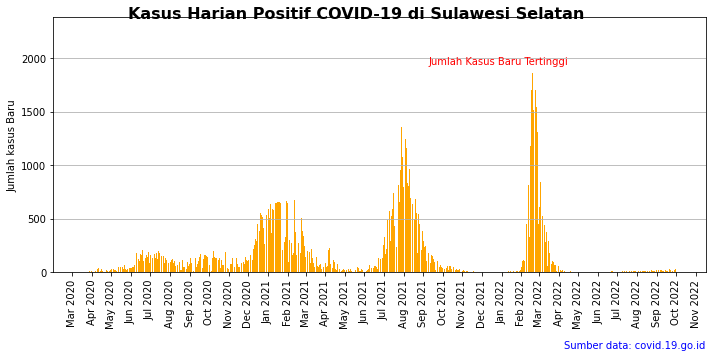

In [52]:
import pandas as pd
import requests
resp_sulsel = requests.get('https://data.covid19.go.id/public/api/prov_detail_SULAWESI_SELATAN.json', verify=False)
print("Status Keberhasilan", resp)
cov_sulsel_raw = resp_sulsel.json()

cov_sulsel= pd.DataFrame(cov_sulsel_raw['list_perkembangan'])

cov_sulsel_tidy = (cov_sulsel.drop(columns=[item for item in cov_sulsel.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_sulsel_tidy['tanggal'] = pd.to_datetime(cov_sulsel_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_sulsel_tidy, x='tanggal', height='kasus_baru', color='orange')
fig.suptitle('Kasus Harian Positif COVID-19 di Sulawesi Selatan', y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus Baru')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.text(0.6, 0.84, 'Jumlah Kasus Baru Tertinggi', transform=fig.transFigure, color='red')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

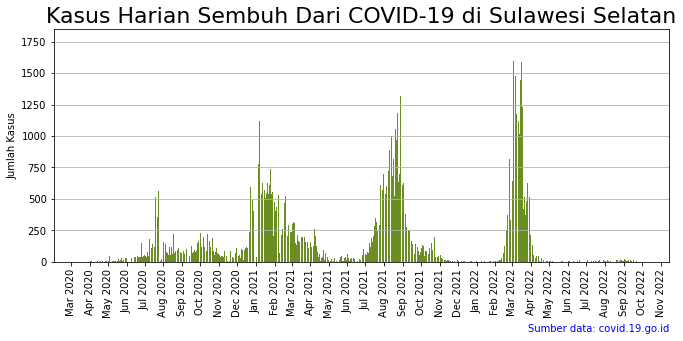

In [12]:
import numpy as np
import pandas as pd
import requests
resp_sulsel = requests.get('https://data.covid19.go.id/public/api/prov_detail_SULAWESI_SELATAN.json', verify=False)
cov_sulsel_raw = resp_sulsel.json()

cov_sulsel= pd.DataFrame(cov_sulsel_raw['list_perkembangan'])

cov_sulsel_tidy = (cov_sulsel.drop(columns=[item for item in cov_sulsel.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_sulsel_tidy['tanggal'] = pd.to_datetime(cov_sulsel_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_sulsel_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Sulawesi Selatan',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

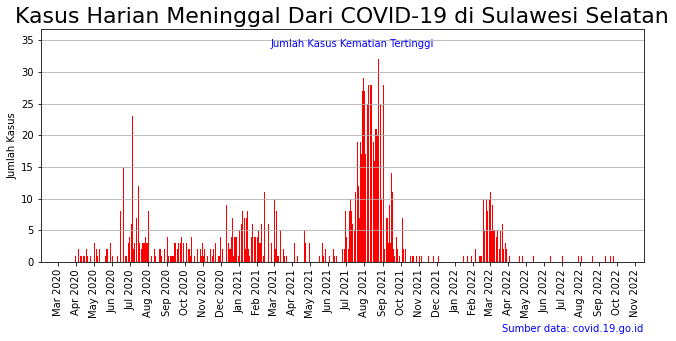

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_sulsel_tidy, x='tanggal', height='meninggal', color='red')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Sulawesi Selatan',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.text(0.4, 0.86, 'Jumlah Kasus Kematian Tertinggi', transform=fig.transFigure, color='blue')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Perkembangan kasus dalam rentang waktu pekanan di Sulawesi Selatan**

---



In [17]:
import numpy as np
import pandas as pd
import requests
resp_sulsel = requests.get('https://data.covid19.go.id/public/api/prov_detail_SULAWESI_SELATAN.json', verify=False)
cov_sulsel_raw = resp_sulsel.json()

cov_sulsel= pd.DataFrame(cov_sulsel_raw['list_perkembangan'])

cov_sulsel_tidy = (cov_sulsel.drop(columns=[item for item in cov_sulsel.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_sulsel_tidy['tanggal'] = pd.to_datetime(cov_sulsel_tidy['tanggal']*1e6, unit='ns')

cov_sulsel_pekanan = (cov_sulsel_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_sulsel_pekanan['tahun'] = cov_sulsel_pekanan['tanggal'].apply(lambda x: x.year)
cov_sulsel_pekanan['pekan_ke'] = cov_sulsel_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_sulsel_pekanann = cov_sulsel_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_sulsel_pekanan:')
print(cov_sulsel_pekanan.info())
print('\nLima data teratas cov_sulsel_pekanan:\n', cov_sulsel_pekanan.tail(10))

Info cov_sulsel_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   133 non-null    datetime64[ns]
 1   jumlah    133 non-null    int64         
 2   tahun     133 non-null    int64         
 3   pekan_ke  133 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.3 KB
None

Lima data teratas cov_sulsel_pekanan:
        tanggal  jumlah  tahun  pekan_ke
123 2022-07-31      83   2022        30
124 2022-08-07     100   2022        31
125 2022-08-14      81   2022        32
126 2022-08-21      96   2022        33
127 2022-08-28      99   2022        34
128 2022-09-04      97   2022        35
129 2022-09-11     101   2022        36
130 2022-09-18      98   2022        37
131 2022-09-25     134   2022        38
132 2022-10-02      97   2022        39


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Sepuluh data teratas:
        tanggal  jumlah  tahun  pekan_ke  jumlah_pekanlalu  lebih_baik
123 2022-07-31      83   2022        30                67       False
124 2022-08-07     100   2022        31                83       False
125 2022-08-14      81   2022        32               100        True
126 2022-08-21      96   2022        33                81       False
127 2022-08-28      99   2022        34                96       False
128 2022-09-04      97   2022        35                99        True
129 2022-09-11     101   2022        36                97       False
130 2022-09-18      98   2022        37               101        True
131 2022-09-25     134   2022        38                98       False
132 2022-10-02      97   2022        39               134        True


<Figure size 432x288 with 0 Axes>

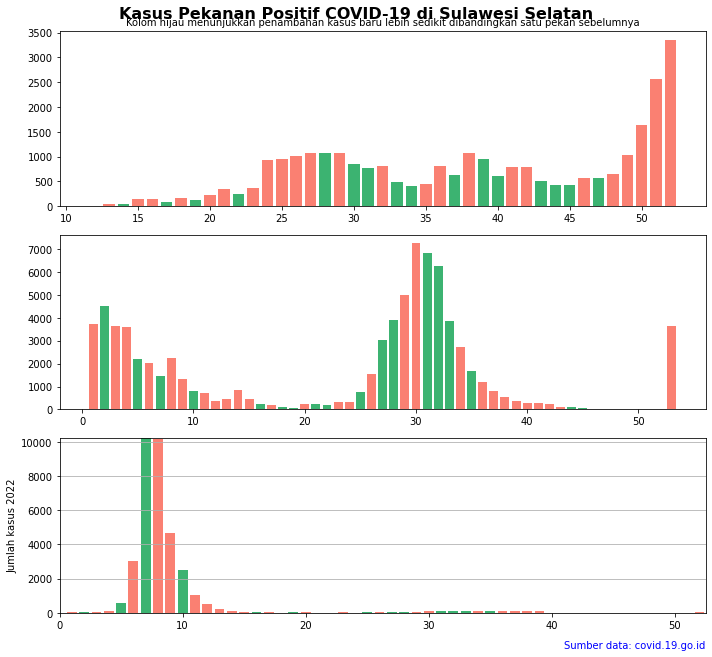

In [22]:

import numpy as np
import pandas as pd
import requests
resp_sulsel = requests.get('https://data.covid19.go.id/public/api/prov_detail_SULAWESI_SELATAN.json', verify=False)
cov_sulsel_raw = resp_sulsel.json()

cov_sulsel= pd.DataFrame(cov_sulsel_raw['list_perkembangan'])

cov_sulsel_tidy = (cov_sulsel.drop(columns=[item for item in cov_sulsel.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_sulsel_tidy['tanggal'] = pd.to_datetime(cov_sulsel_tidy['tanggal']*1e6, unit='ns')

cov_sulsel_pekanan = (cov_sulsel_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_sulsel_pekanan['tahun'] = cov_sulsel_pekanan['tanggal'].apply(lambda x: x.year)
cov_sulsel_pekanan['pekan_ke'] = cov_sulsel_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_sulsel_pekanann = cov_sulsel_pekanan[['tahun', 'pekan_ke', 'jumlah']]

#Untuk dapat mengetahui apakah pekan ini lebih baik dari pekan kemarin, dapat dilakukakn kalkulasi sebagai berikut:
cov_sulsel_pekanan['jumlah_pekanlalu'] = cov_sulsel_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_sulsel_pekanan['lebih_baik'] = cov_sulsel_pekanan['jumlah'] < cov_sulsel_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_sulsel_pekanan.tail(10))

#Setelah mengetahui apakah pekan ini lebih baik dari pekan kemarin, kita dapat mempresentasikannya lewat bar chat untuk mudah dipahami:
import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_sulsel_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_sulsel_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
						figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Sulawesi Selatan',
			y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
	ax.bar(data=cov_sulsel_pekanan.loc[cov_sulsel_pekanan['tahun']==tahun_terjadi_covid19[i]],
		  x='pekan_ke', height='jumlah',
		  color=['mediumseagreen' if x is True else 'salmon'
				for x in cov_sulsel_pekanan['lebih_baik']])
	if i == 0:
		ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya' ,
					fontsize=10)
	elif i == jml_tahun_terjadi_covid19-1:
		ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
			   ha='right', transform=ax.transAxes)
		
		ax.set_xlim([0, 52.5])
		ax.set_ylim([0, max(cov_sulsel_pekanan['jumlah'])])
		ax.set_xlabel('')
		ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
		ax.grid(axis='y')
		
plt.tight_layout()
plt.show()

**Pola dan Dimanika Covid-19 di Sulawesi Selatan**

---



Seperti yang kita ketahui berdasarkan data yang ada bahwa terdapat kasus yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat COVID-19 di Sulawesi Selatan. Sementara itu penambahan kasus baru terus terjadi di masyarakat. Sehingga dari itu, saya ingin mengetahui pola dan dinamika covid-19 di Sulawesi Selatan, dimana saya ingin mengetahui "Hingga saat ini ada berapa kasus yang masih aktif di Sulawesi Selatan?"

In [26]:
import numpy as np
import pandas as pd
import requests
resp_sulsel = requests.get('https://data.covid19.go.id/public/api/prov_detail_SULAWESI_SELATAN.json', verify=False)
cov_sulsel_raw = resp_sulsel.json()

cov_sulsel= pd.DataFrame(cov_sulsel_raw['list_perkembangan'])

cov_sulsel_tidy = (cov_sulsel.drop(columns=[item for item in cov_sulsel.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_sulsel_tidy['tanggal'] = pd.to_datetime(cov_sulsel_tidy['tanggal']*1e6, unit='ns')

cov_sulsel_akumulasi = cov_sulsel_tidy[['tanggal']].copy()
cov_sulsel_akumulasi['akumulasi_aktif'] = (cov_sulsel_tidy['kasus_baru'] - cov_sulsel_tidy['sembuh'] - cov_sulsel_tidy['meninggal']).cumsum()
cov_sulsel_akumulasi['akumulasi_sembuh'] = cov_sulsel_tidy['sembuh'].cumsum()
cov_sulsel_akumulasi['akumulasi_meninggal'] = cov_sulsel_tidy['meninggal'].cumsum()
print(cov_sulsel_akumulasi.tail(10))


       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
916 2022-09-21              170            141965                 2490
917 2022-09-22              180            141975                 2491
918 2022-09-23              170            141994                 2492
919 2022-09-24              192            141995                 2492
920 2022-09-25              175            142027                 2493
921 2022-09-26              176            142040                 2494
922 2022-09-27              195            142040                 2494
923 2022-09-28              214            142041                 2495
924 2022-09-29              227            142041                 2495
925 2022-09-30              253            142042                 2497


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
921 2022-09-26              176            142040                 2494
922 2022-09-27              195            142040                 2494
923 2022-09-28              214            142041                 2495
924 2022-09-29              227            142041                 2495
925 2022-09-30              253            142042                 2497


<Figure size 432x288 with 0 Axes>

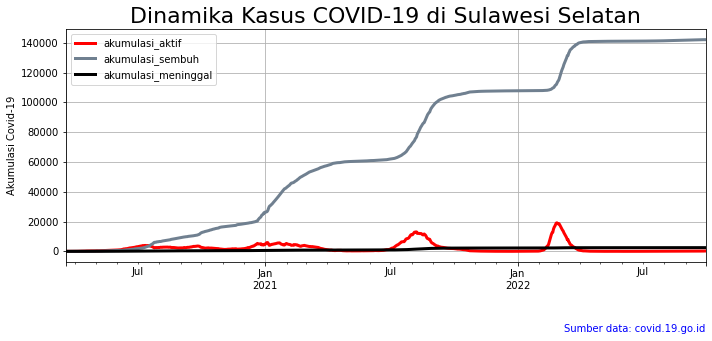

In [30]:
import numpy as np
import pandas as pd
import requests
resp_sulsel = requests.get('https://data.covid19.go.id/public/api/prov_detail_SULAWESI_SELATAN.json', verify=False)
cov_sulsel_raw = resp_sulsel.json()

cov_sulsel= pd.DataFrame(cov_sulsel_raw['list_perkembangan'])

cov_sulsel_tidy = (cov_sulsel.drop(columns=[item for item in cov_sulsel.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_sulsel_tidy['tanggal'] = pd.to_datetime(cov_sulsel_tidy['tanggal']*1e6, unit='ns')

cov_sulsel_akumulasi = cov_sulsel_tidy[['tanggal']].copy()
cov_sulsel_akumulasi['akumulasi_aktif'] = (cov_sulsel_tidy['kasus_baru'] - cov_sulsel_tidy['sembuh'] - cov_sulsel_tidy['meninggal']).cumsum()
cov_sulsel_akumulasi['akumulasi_sembuh'] = cov_sulsel_tidy['sembuh'].cumsum()
cov_sulsel_akumulasi['akumulasi_meninggal'] = cov_sulsel_tidy['meninggal'].cumsum()
print(cov_sulsel_akumulasi.tail())

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_sulsel_akumulasi_ts = cov_sulsel_akumulasi.set_index('tanggal')
cov_sulsel_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
						color=['red', 'slategrey', 'black'])

ax.set_title('Dinamika Kasus COVID-19 di Sulawesi Selatan',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi Covid-19')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()